In [2]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from sklearn import preprocessing
import warnings, sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import dask
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report

In [3]:
# Data types for less memory usage
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
#def convert_types(df):
    # Convert data types to reduce memory
   # for c in df:
    #    col_type = str(df[c].dtypes)
    #    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
        # Convert objects to category
  #      if col_type == 'object':
  #          df[c] = df[c].astype('category')
        
        # numerics
     #   elif col_type in numerics:
      #      c_min = df[c].min()
       #     c_max = df[c].max()
    #        if col_type[:3] == 'int':
    #            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
   #                 df[c] = df[c].astype(np.int8)
     #           elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
      #              df[c] = df[c].astype(np.int16)
      #          elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
      #              df[c] = df[c].astype(np.int32)
       #         elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
       #             df[c] = df[c].astype(np.int64)  
        #    else:
         #       if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          #          df[c] = df[c].astype(np.float16)
          #      elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
           #         df[c] = df[c].astype(np.float32)
            #    else:
             #       df[c] = df[c].astype(np.float64)  
        
    # return df

In [5]:
train = dd.read_csv('train.csv', dtype=dtypes)
train = train.compute()

In [6]:
print(train.shape)
train.head()

(8921483, 83)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921483 entries, 0 to 67086
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float16 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                      

-------------------------------------------------------------------------------------------------------
Find Null and Missing values 
-----------------------------------------------------------------------------------------------

In [8]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,1730,95.141637,95.141637,float16
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category
...,...,...,...,...,...
1,ProductName,6,0.000000,98.935569,category
45,Census_HasOpticalDiskDrive,2,0.000000,92.281272,int8
54,Census_OSVersion,469,0.000000,15.845202,category
55,Census_OSArchitecture,3,0.000000,90.858045,category


In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Total Columns: " + str(df.shape[1]) + "\n"     
            "Missing Columns #: " + str(mis_val_table_ren_columns.shape[0]))
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
print(missing_values_table(train))

Total Columns: 83
Missing Columns #: 44
                                                   Missing Values  \
PuaMode                                                   8919174   
Census_ProcessorClass                                     8884852   
DefaultBrowsersIdentifier                                 8488045   
Census_IsFlightingInternal                                7408759   
Census_InternalBatteryType                                6338429   
Census_ThresholdOptIn                                     5667325   
Census_IsWIMBootEnabled                                   5659703   
SmartScreen                                               3177011   
OrganizationIdentifier                                    2751518   
SMode                                                      537759   
CityIdentifier                                             325409   
Wdft_RegionIdentifier                                      303451   
Wdft_IsGamer                                               3034

In [11]:
train['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

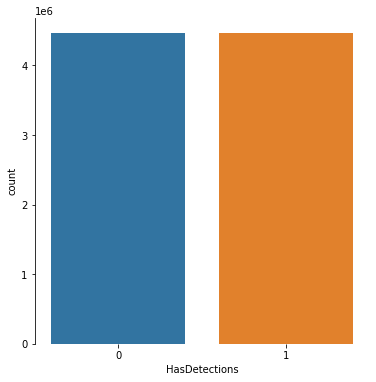

In [12]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="HasDetections", data=train, label="Label count")
sns.despine(bottom=True)

<AxesSubplot:>

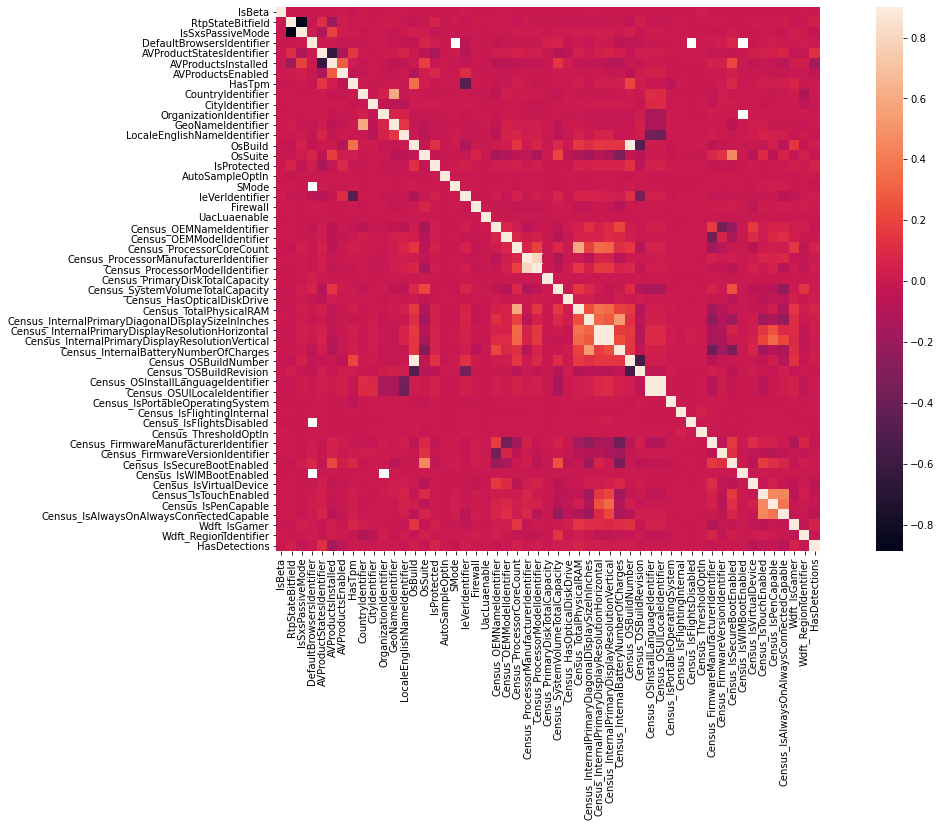

In [13]:
train
corrmat = train.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)

In [20]:
plt.figure(figsize=(20,10))
c= train.corr()
c

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
IsBeta,1.000000,0.000129,-0.000051,-0.002435,-0.003540,-0.000598,0.002370,-0.021834,0.000916,-0.000370,...,-0.000846,-0.002665,-2.189444e-06,0.000259,-0.001038,-0.000545,-0.000669,-0.001293,0.000730,-0.000040
RtpStateBitfield,0.000129,1.000000,-0.885303,-0.009013,0.108633,-0.184162,0.009698,-0.005797,0.012023,-0.001224,...,0.007264,-0.015517,8.306472e-05,0.008227,0.009711,0.005180,0.020278,-0.022863,-0.003491,0.041486
IsSxsPassiveMode,-0.000051,-0.885303,1.000000,0.010213,-0.113841,0.194934,0.025219,0.013812,-0.012522,0.000982,...,-0.007214,0.020067,-6.977721e-05,-0.010291,-0.006183,-0.001402,-0.015852,0.030682,0.002790,-0.035066
DefaultBrowsersIdentifier,-0.002435,-0.009013,0.010213,1.000000,0.001801,0.002359,-0.010120,-0.013976,-0.001561,0.004813,...,0.025183,0.070875,NaN,-0.011235,0.010328,0.014866,0.005312,0.012515,0.015218,-0.002002
AVProductStatesIdentifier,-0.003540,0.108633,-0.113841,0.001801,1.000000,-0.632899,-0.122054,0.140325,0.006339,-0.001446,...,-0.018865,-0.034235,2.583190e-04,0.029202,0.040984,0.035448,0.063949,-0.022421,-0.020109,0.117404
AVProductsInstalled,-0.000598,-0.184162,0.194934,0.002359,-0.632899,1.000000,0.286430,0.025564,-0.022442,0.004235,...,0.042414,0.214745,-3.927709e-04,-0.045854,-0.013320,-0.028525,-0.070722,0.016036,0.033732,-0.149626
AVProductsEnabled,0.002370,0.009698,0.025219,-0.010120,-0.122054,0.286430,1.000000,-0.043451,-0.018487,0.005327,...,-0.001276,0.039220,-8.703695e-05,-0.010598,-0.002616,-0.008302,-0.020091,-0.013307,0.005794,-0.041985
HasTpm,-0.021834,-0.005797,0.013812,-0.013976,0.140325,0.025564,-0.043451,1.000000,0.003809,-0.007577,...,0.008914,0.086069,7.998986e-05,0.002080,0.029129,0.017395,0.026188,0.063420,-0.013442,0.005490
CountryIdentifier,0.000916,0.012023,-0.012522,-0.001561,0.006339,-0.022442,-0.018487,0.003809,1.000000,0.000207,...,0.021221,-0.010058,4.508359e-04,-0.005753,0.004860,-0.010613,-0.005898,0.017374,-0.117656,0.007099
CityIdentifier,-0.000370,-0.001224,0.000982,0.004813,-0.001446,0.004235,0.005327,-0.007577,0.000207,1.000000,...,0.015764,0.008822,8.397056e-05,0.004531,-0.011361,-0.000863,0.000416,0.003759,-0.058748,-0.002282


<Figure size 1440x720 with 0 Axes>

Seperate the categorical and the numerical columns in the Train Set

In [14]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

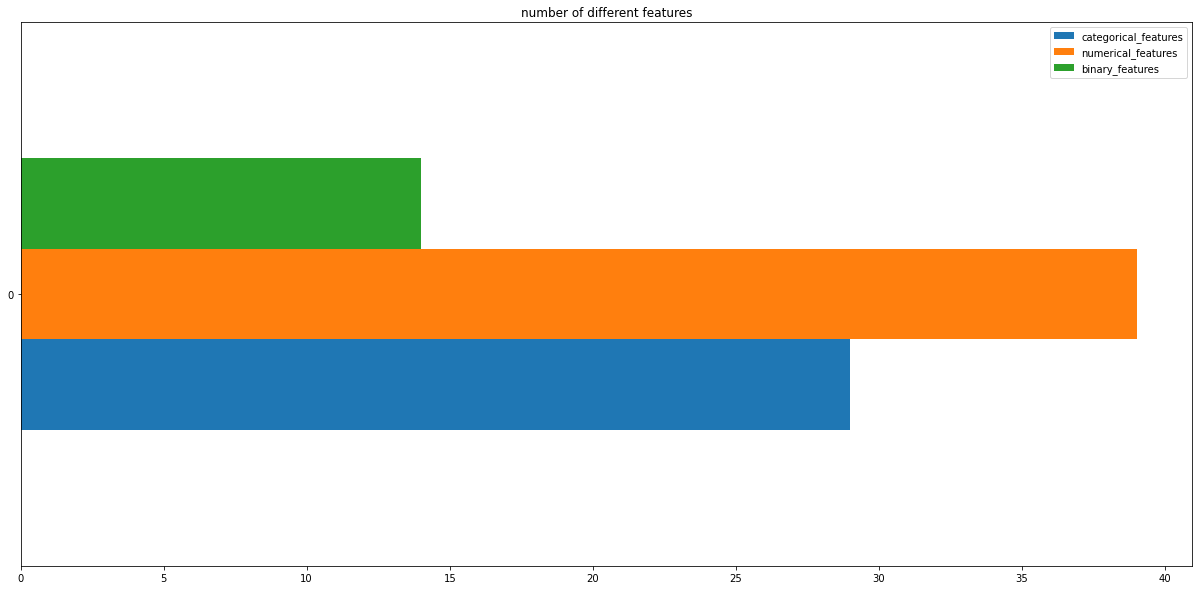

In [15]:
categories_list = []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="barh", figsize=(21, 10), title="number of different features")

In [24]:
def with_hue(plot, feature, Number_of_categories,hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [25]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

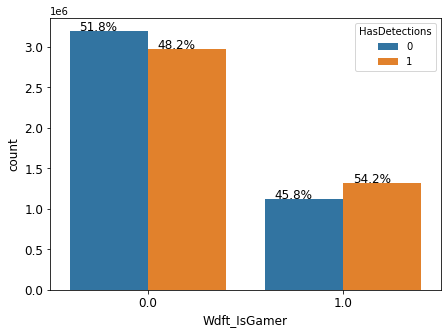

In [27]:
plt.figure(figsize = (7,5))
ax = sns.countplot('Wdft_IsGamer', hue= 'HasDetections', data = train)
plt.xticks(size = 12)
plt.xlabel('Wdft_IsGamer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.Wdft_IsGamer,2,2)

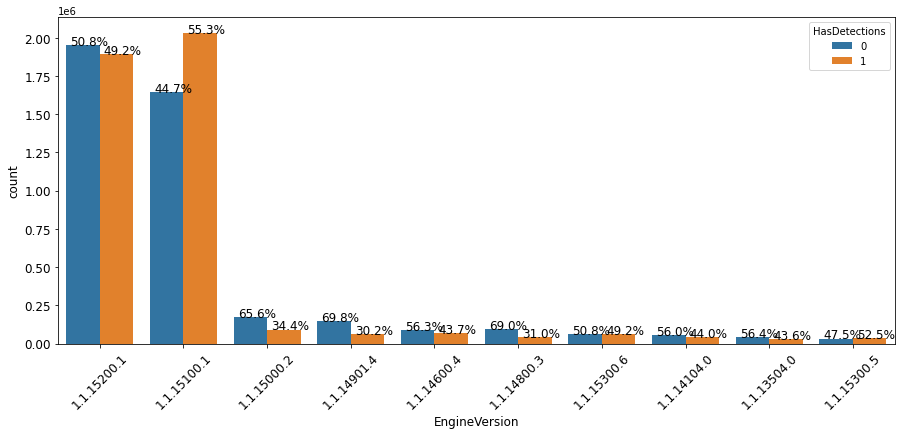

In [32]:
plt.figure(figsize = (15,6))
ax = sns.countplot('EngineVersion', order = train.EngineVersion.value_counts().iloc[:10].index, hue = 'HasDetections', data = train)
plt.xticks(rotation = 45, size = 12)
plt.xlabel('EngineVersion', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.EngineVersion, 10, 2)